<a href="https://colab.research.google.com/github/muhammadaryadwisaputra/Bengkel-Coding/blob/main/Uas(BK)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In [1]:
# 1. Mount Google Drive (jalankan ini dulu)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


5 Baris Pertama Dataset:
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_W

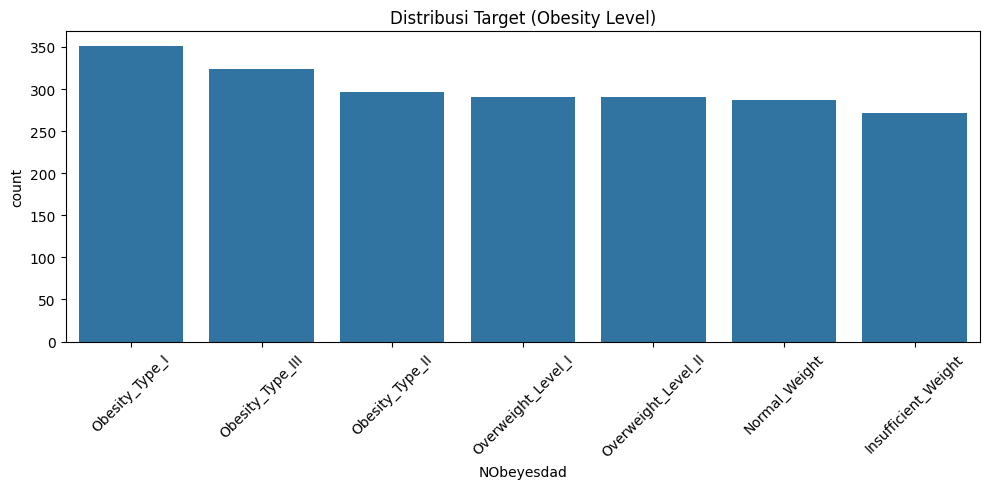

In [2]:
# 2. Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Load dataset (ganti path ini dengan yang benar sesuai lokasi file di Drive kamu)
df = pd.read_csv('/content/drive/MyDrive/DataBK/ObesityDataSet.csv')

# 4 Tampilkan beberapa baris pertama
print("5 Baris Pertama Dataset:")
print(df.head())

# 5. Informasi Umum Dataset
print("\nInformasi Dataset:")
print(df.info())

print("\nDeskripsi Statistik:")
print(df.describe(include='all'))

# 6. Cek Missing Values
print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())

# 7. Cek Unique Values
print("\nJumlah Nilai Unik per Kolom:")
print(df.nunique())

# 8. Cek Duplikasi
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())

# 9. Visualisasi Distribusi Target
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title("Distribusi Target (Obesity Level)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




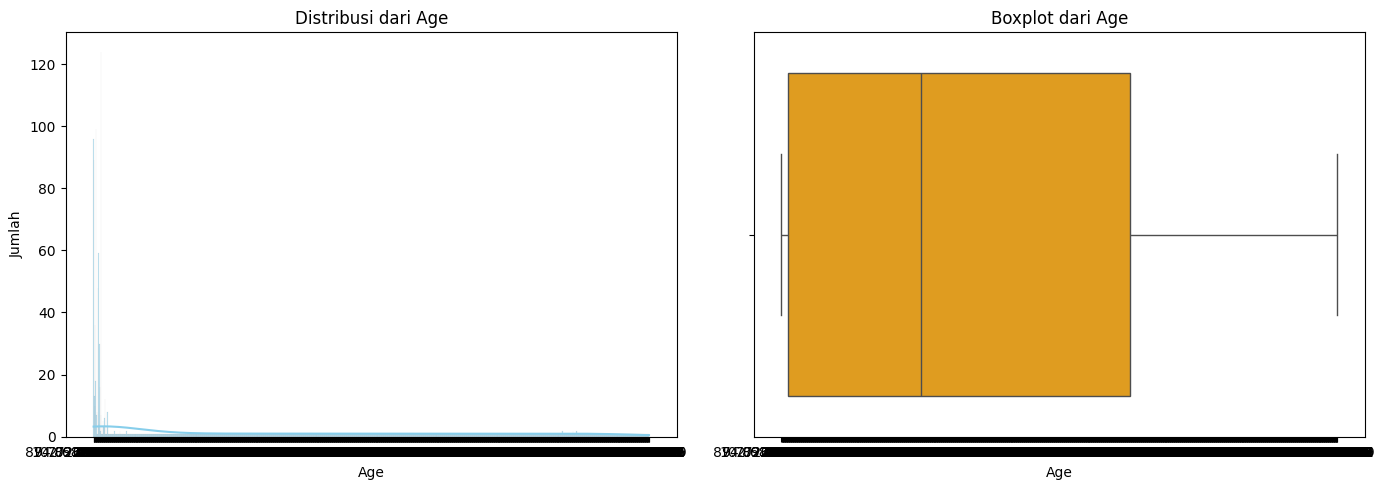

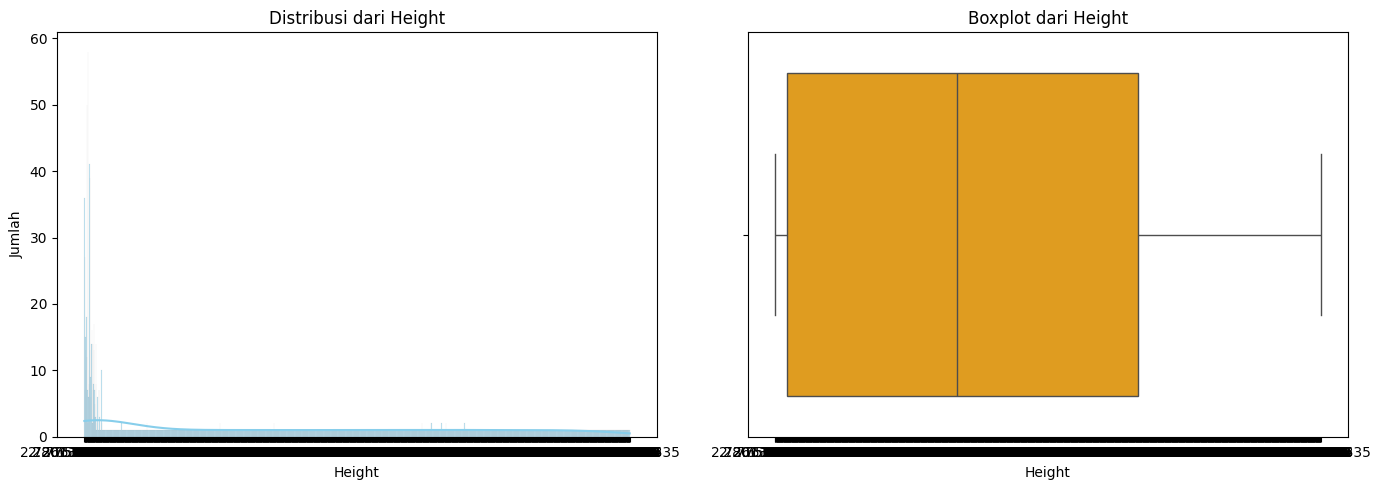

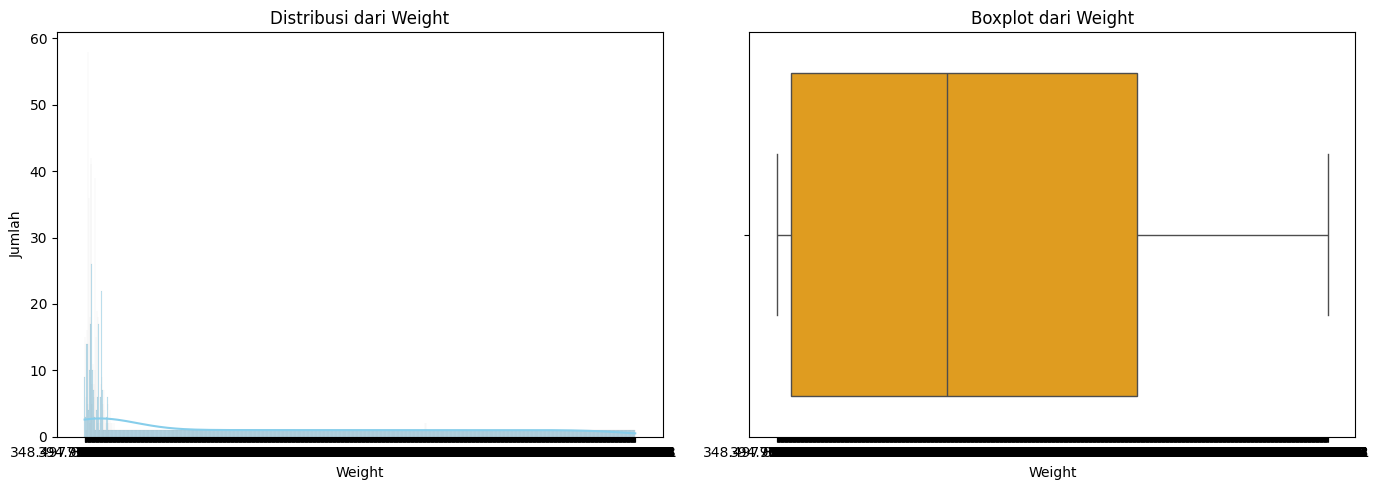

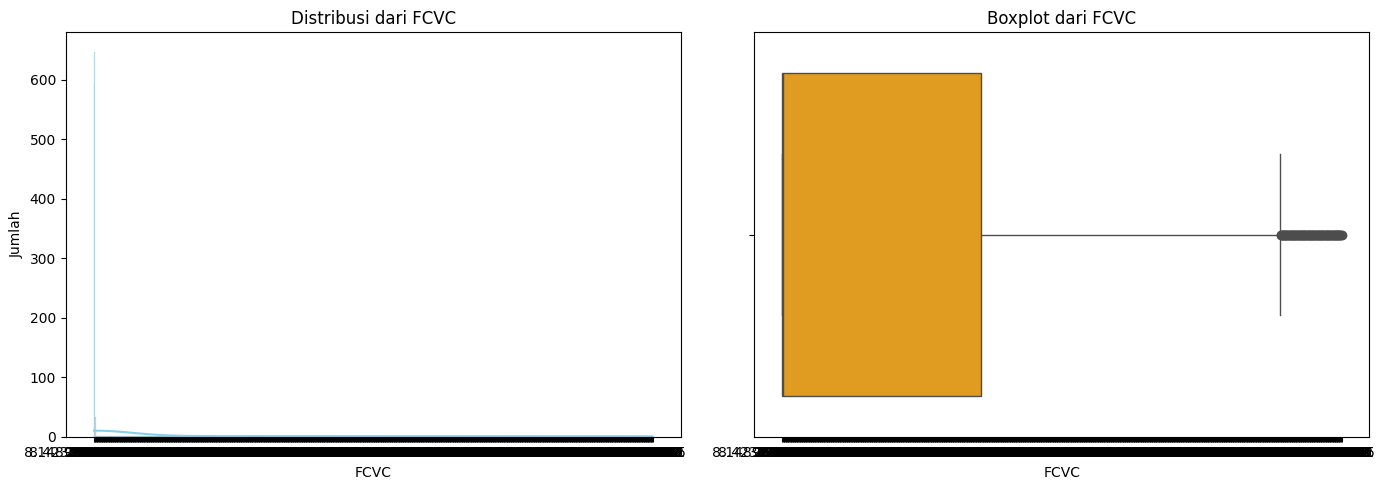

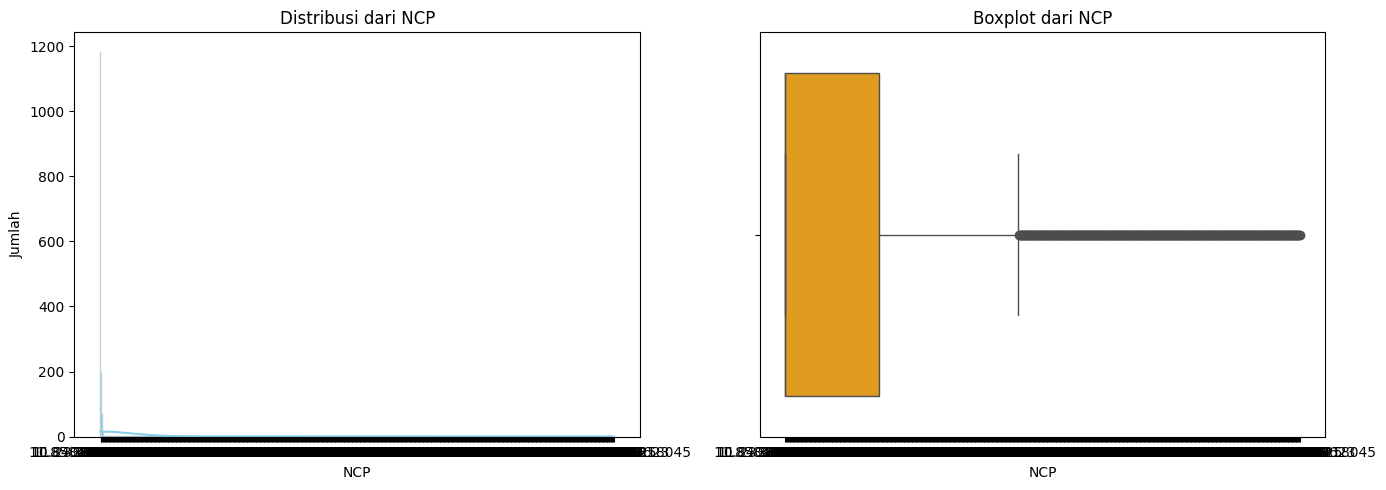

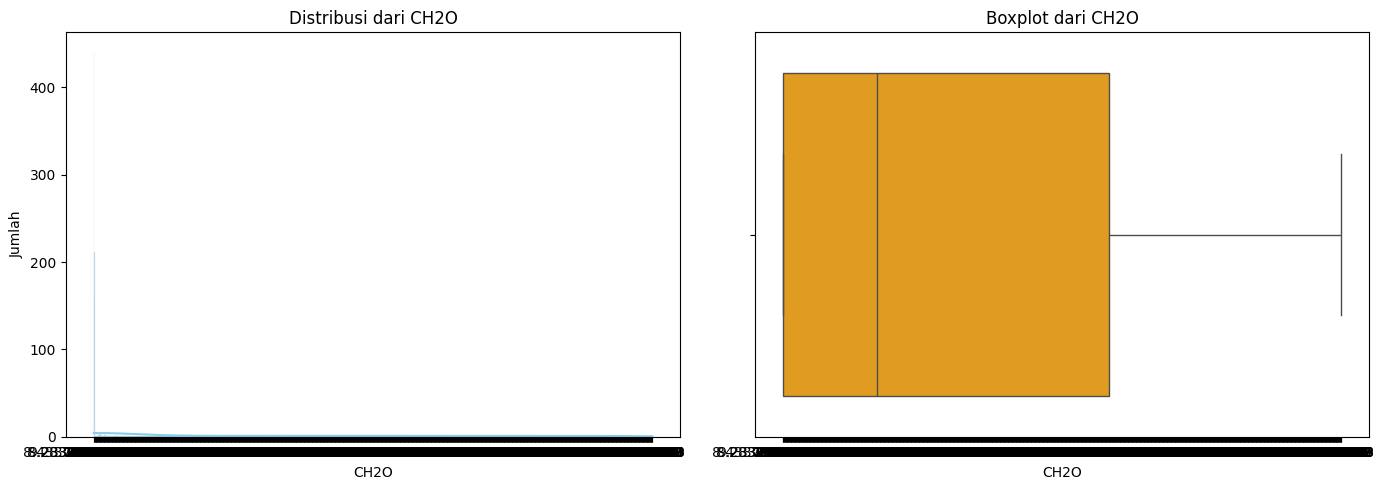

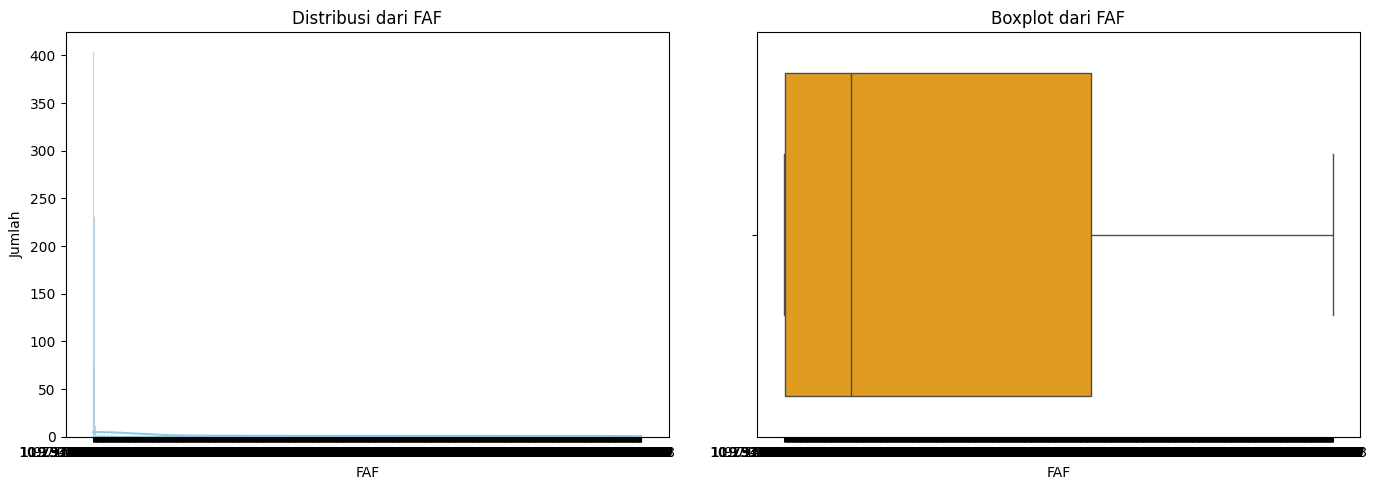

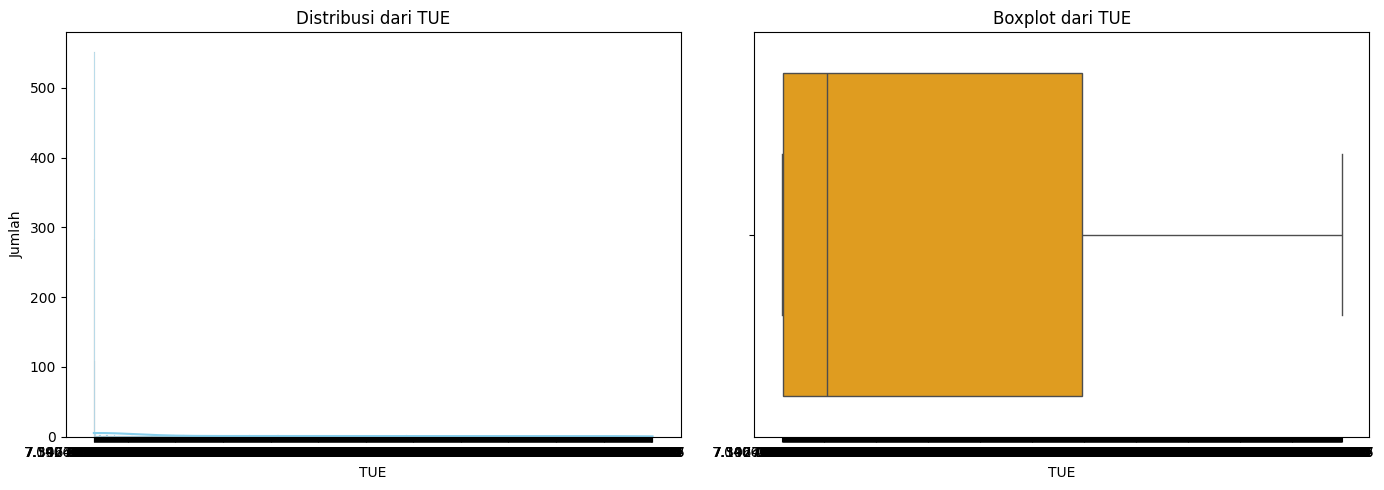

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar fitur numerik
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Loop untuk setiap fitur
for feature in numerical_features:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribusi dari {feature}', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Jumlah')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature], color='orange')
    plt.title(f'Boxplot dari {feature}', fontsize=12)
    plt.xlabel(feature)

    plt.tight_layout()
    plt.show()


# Prosesing data



In [4]:
# Cek missing values
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

# Cek duplikasi
print("\nJumlah Data Duplikat:", df.duplicated().sum())

# Hapus duplikasi (jika ada)
df = df.drop_duplicates()


Jumlah Missing Values per Kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Jumlah Data Duplikat: 18


In [5]:
# Pastikan df bukan slice dari DataFrame lain (gunakan .copy() jika hasil filter sebelumnya)
df = df.copy()

# Konversi kolom numerik ke float
numerik_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numerik_cols:
    df.loc[:, col] = pd.to_numeric(df[col], errors='coerce')  # menggunakan .loc agar aman

# Hapus baris yang memiliki nilai NaN
df.dropna(inplace=True)


In [6]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Terapkan pada beberapa kolom penting
for col in ['Age', 'Height', 'Weight']:
    df = remove_outliers_iqr(df, col)

In [7]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [8]:
from imblearn.over_sampling import SMOTE

X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)


In [10]:
X_final = pd.DataFrame(X_scaled, columns=X.columns)
y_final = y_resampled.reset_index(drop=True)

print("Shape data akhir (fitur):", X_final.shape)
print("Distribusi target setelah SMOTE:\n", y_final.value_counts())

Shape data akhir (fitur): (1953, 16)
Distribusi target setelah SMOTE:
 NObeyesdad
1    279
5    279
6    279
2    279
0    279
3    279
4    279
Name: count, dtype: int64


Kesimpulan Preprocessing
Missing values dan data duplikat telah ditangani.

Outlier telah diatasi dengan metode IQR (misalnya pada 'Weight').

Semua fitur kategorikal telah dikonversi menjadi numerik.

Seluruh fitur masih digunakan, bisa difilter lebih lanjut pada tahap modeling.

Ketidakseimbangan kelas target telah diatasi menggunakan SMOTE.

Fitur numerik telah distandardisasi menggunakan StandardScaler.

# Pemodelan dan Evaluasi

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


In [12]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }

    print(f"\n{name}:\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))



SVM:

[[47  8  0  0  0  0  0]
 [ 6 42  0  0  0  6  2]
 [ 0  2 54  0  0  0  0]
 [ 0  1  3 52  0  0  0]
 [ 0  1  0  1 54  0  0]
 [ 1  9  0  0  0 44  2]
 [ 0  7  0  0  0  2 47]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        55
           1       0.60      0.75      0.67        56
           2       0.95      0.96      0.96        56
           3       0.98      0.93      0.95        56
           4       1.00      0.96      0.98        56
           5       0.85      0.79      0.81        56
           6       0.92      0.84      0.88        56

    accuracy                           0.87       391
   macro avg       0.88      0.87      0.87       391
weighted avg       0.88      0.87      0.87       391


KNN:

[[49  5  1  0  0  0  0]
 [17 23  4  0  0  6  6]
 [ 0  3 46  3  0  2  2]
 [ 0  0  1 55  0  0  0]
 [ 0  0  0  1 55  0  0]
 [ 2  8  2  0  0 40  4]
 [ 1  0  1  2  0  4 48]]
              precision    recall  f1-score   suppo

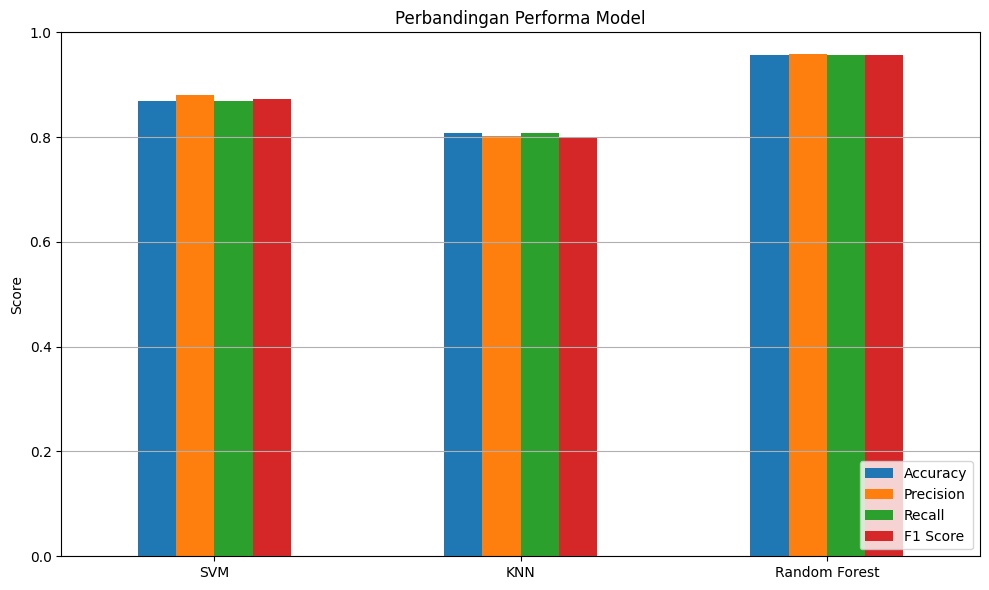

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert results ke DataFrame
df_results = pd.DataFrame(results).T

df_results.plot(kind='bar', figsize=(10, 6))
plt.title('Perbandingan Performa Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Hyperparameter Tuning


=== Akurasi Setelah Hyperparameter Tuning ===
KNN Accuracy: 0.8363
SVM Accuracy: 0.9309
Random Forest Accuracy: 0.9616


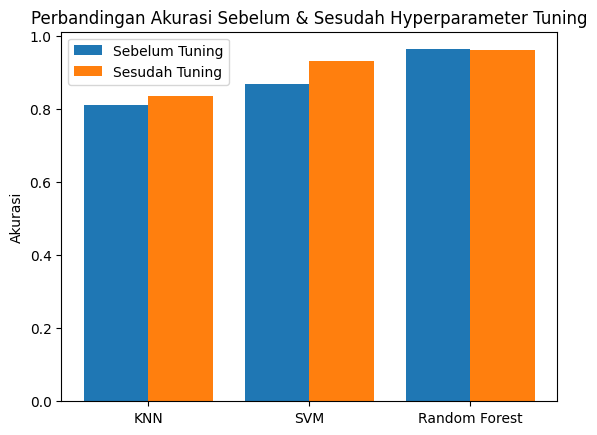

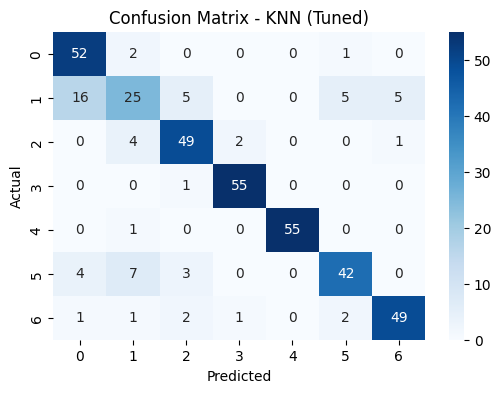


Classification Report for KNN (Tuned):

              precision    recall  f1-score   support

           0       0.71      0.95      0.81        55
           1       0.62      0.45      0.52        56
           2       0.82      0.88      0.84        56
           3       0.95      0.98      0.96        56
           4       1.00      0.98      0.99        56
           5       0.84      0.75      0.79        56
           6       0.89      0.88      0.88        56

    accuracy                           0.84       391
   macro avg       0.83      0.84      0.83       391
weighted avg       0.83      0.84      0.83       391



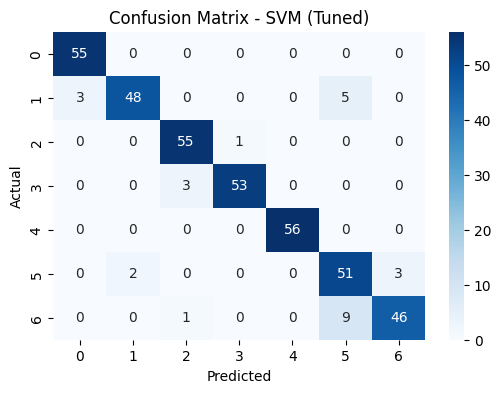


Classification Report for SVM (Tuned):

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        55
           1       0.96      0.86      0.91        56
           2       0.93      0.98      0.96        56
           3       0.98      0.95      0.96        56
           4       1.00      1.00      1.00        56
           5       0.78      0.91      0.84        56
           6       0.94      0.82      0.88        56

    accuracy                           0.93       391
   macro avg       0.94      0.93      0.93       391
weighted avg       0.94      0.93      0.93       391



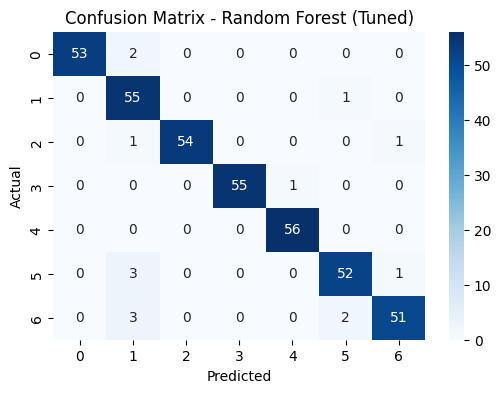


Classification Report for Random Forest (Tuned):

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        55
           1       0.86      0.98      0.92        56
           2       1.00      0.96      0.98        56
           3       1.00      0.98      0.99        56
           4       0.98      1.00      0.99        56
           5       0.95      0.93      0.94        56
           6       0.96      0.91      0.94        56

    accuracy                           0.96       391
   macro avg       0.96      0.96      0.96       391
weighted avg       0.96      0.96      0.96       391

Model terbaik berhasil disimpan sebagai 'best_model.pkl'


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# ------------------- SCALING -------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------- MODEL SEBELUM TUNING -------------------
model_knn_before = KNeighborsClassifier()
model_svm_before = SVC()
model_rf_before = RandomForestClassifier()

model_knn_before.fit(X_train_scaled, y_train)
model_svm_before.fit(X_train_scaled, y_train)
model_rf_before.fit(X_train_scaled, y_train)

acc_knn_before = accuracy_score(y_test, model_knn_before.predict(X_test_scaled))
acc_svm_before = accuracy_score(y_test, model_svm_before.predict(X_test_scaled))
acc_rf_before = accuracy_score(y_test, model_rf_before.predict(X_test_scaled))

# ------------------- HYPERPARAMETER TUNING -------------------
# KNN
param_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5)
grid_knn.fit(X_train_scaled, y_train)
best_knn = grid_knn.best_estimator_

# SVM
param_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(), param_svm, cv=5)
grid_svm.fit(X_train_scaled, y_train)
best_svm = grid_svm.best_estimator_

# Random Forest
param_rf = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_rf, cv=5)
grid_rf.fit(X_train_scaled, y_train)
best_rf = grid_rf.best_estimator_

# ------------------- AKURASI SETELAH TUNING -------------------
acc_knn_after = accuracy_score(y_test, best_knn.predict(X_test_scaled))
acc_svm_after = accuracy_score(y_test, best_svm.predict(X_test_scaled))
acc_rf_after = accuracy_score(y_test, best_rf.predict(X_test_scaled))

print("\n=== Akurasi Setelah Hyperparameter Tuning ===")
print(f"KNN Accuracy: {acc_knn_after:.4f}")
print(f"SVM Accuracy: {acc_svm_after:.4f}")
print(f"Random Forest Accuracy: {acc_rf_after:.4f}")

# ------------------- VISUALISASI PERBANDINGAN -------------------
model_names = ['KNN', 'SVM', 'Random Forest']
acc_before = [acc_knn_before, acc_svm_before, acc_rf_before]
acc_after = [acc_knn_after, acc_svm_after, acc_rf_after]

x = range(len(model_names))
plt.bar(x, acc_before, width=0.4, label='Sebelum Tuning', align='center')
plt.bar([i + 0.4 for i in x], acc_after, width=0.4, label='Sesudah Tuning', align='center')
plt.xticks([i + 0.2 for i in x], model_names)
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Sebelum & Sesudah Hyperparameter Tuning')
plt.legend()
plt.show()

# ------------------- HEATMAP CONFUSION MATRIX -------------------
models_after = {
    "KNN (Tuned)": best_knn,
    "SVM (Tuned)": best_svm,
    "Random Forest (Tuned)": best_rf
}

for name, model in models_after.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    # ------------------- SIMPAN MODEL TERBAIK -------------------
# Ganti ke best_rf atau best_knn jika lebih bagus
best_model = best_rf
joblib.dump(best_model, 'best_model.pkl')
print("Model terbaik berhasil disimpan sebagai 'best_model.pkl'")



# Bagian Baru

In [16]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [17]:
import streamlit as st
import joblib
import numpy as np

# Load model
model = joblib.load('best_model.pkl')

# Judul aplikasi
st.title("🎯 Prediksi Klasifikasi")
st.write("Masukkan data fitur untuk memprediksi kelas menggunakan model yang telah dioptimasi.")

# Buat input fitur (ini disesuaikan dengan jumlah fitur X kamu)
# Misal jumlah fitur = 4 (seperti pada dataset Iris atau yang mirip)
feature_1 = st.number_input("Fitur 1", value=0.0)
feature_2 = st.number_input("Fitur 2", value=0.0)
feature_3 = st.number_input("Fitur 3", value=0.0)
feature_4 = st.number_input("Fitur 4", value=0.0)

# Tombol prediksi
if st.button("Prediksi"):
    # Ubah input menjadi array dan lakukan prediksi
    input_data = np.array([[feature_1, feature_2, feature_3, feature_4]])

    # Jika kamu menyimpan scaler, load dan transform dulu:
    # scaler = joblib.load('scaler.pkl')
    # input_data = scaler.transform(input_data)

    prediction = model.predict(input_data)

    st.success(f"Hasil Prediksi: {prediction[0]}")


2025-06-08 12:02:44.665 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 12:02:44.791 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-08 12:02:44.792 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 12:02:44.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 12:02:44.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 12:02:44.796 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 12:02:44.797 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-08 12:02:44.798 Thread 'MainThread': mi